In [1]:
import torch

from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.priors import GammaPrior
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from gpytorch import ExactMarginalLogLikelihood

from botorch.models.gp_regression import SingleTaskGP
from botorch.models.transforms import Normalize, Standardize
from botorch.fit import fit_gpytorch_mll

train_x = torch.tensor([[0.000000],
                        [0.100000],
                        [-1.000000],
                        [-0.392787],
                        [0.297180],
                        [0.759159],
                        [-0.223823],
                        [0.394187],
                        [-0.450012],
                        [-0.115379],
                        [0.200063],
                        [0.436399] ])

rms_beam_size = torch.tensor([[0.000000],
                       [0.100000],
                       [1.000000],
                       [0.392787],
                       [0.297180],
                       [0.759159],
                       [0.223823],
                       [0.394187],
                       [0.450012],
                       [0.115379],
                       [0.200063],
                       [0.436399] ])

train_y = rms_beam_size.pow(2)
noise_prior = GammaPrior(1., 10.)
likelihood = GaussianLikelihood(noise_prior=noise_prior)
input_transform = Normalize(1)
outcome_transform = Standardize(1)
# covar_module = PolynomialKernel(power=2)
covar_module = MaternKernel()
scaled_covar_module = ScaleKernel(covar_module, outputscale_prior=GammaPrior(2.0, 0.15))   

model = SingleTaskGP(train_x, 
                     train_y, 
                     covar_module=scaled_covar_module,
                     input_transform=input_transform,
                     outcome_transform=outcome_transform, 
                     likelihood=likelihood)

mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll)


C:\Users\Dylan\anaconda3\envs\xopt-dev\lib\site-packages\botorch\models\gpytorch.py:119: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  warnings.warn(


ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (noise_prior): GammaPrior()
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (model): SingleTaskGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (noise_prior): GammaPrior()
        (raw_noise_constraint): GreaterThan(1.000E-04)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): MaternKernel(
        (raw_lengthscale_constraint): Positive()
      )
      (outputscale_prior): GammaPrior()
      (raw_outputscale_constraint): Positive()
    )
    (outcome_transform): Standardize()
    (input_transform): Normalize()
  )
)

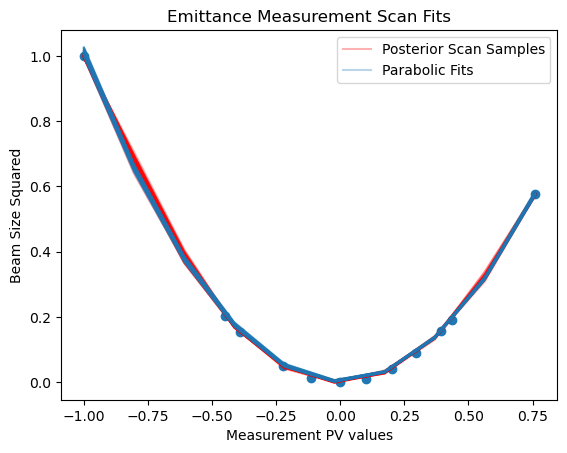

In [2]:
from emitopt.utils import get_valid_emittance_samples

beam_energy = 0.135
q_len=0.108
distance = 2.26

(emits_at_target_valid, 
 emits_sq_at_target, 
 is_valid, 
 sample_validity_rate) = get_valid_emittance_samples(model, beam_energy, q_len, distance, n_samples=50, n_steps_quad_scan=10, visualize=True)


In [3]:
model.covar_module.base_kernel.lengthscale

tensor([[1.1014]], grad_fn=<SoftplusBackward0>)

In [1]:
from matplotlib import pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.hist(emits_at_target_valid.flatten()*90, density=True)
plt.title('Distribution of Sampled Emittances')
plt.xlabel('Emittance')
plt.ylabel('Probability Density')

NameError: name 'emits_at_target_valid' is not defined